In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from ipywidgets import Select, SelectMultiple, IntSlider, ToggleButton, FloatRangeSlider, Label, Tab

from IPython.display import display
from ipywidgets import HBox, VBox

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [3]:
import pandas as pd

In [4]:
defocus_fp = 'defocus_dataset.pkl.gz'
structure_fp = 'structure_dataset.pkl.gz'
noise_fp = 'noise_dataset.pkl.gz'

noise_df = pd.read_pickle(noise_fp)
defocus_df = pd.read_pickle(defocus_fp)
structure_df = pd.read_pickle(structure_fp)

In [5]:
def load_data_from_df(df, query):
    return df.query(query).iloc[0]['img']

def load_mask_from_df(df, query):
    return df.query(query).iloc[0]['mask']

In [6]:
lattices = [
    'bcc_Fe',
    'dc_C',
    'dc_Si',
    'fcc_Ag',
    'fcc_Cu',
    'spinel_Co3O4',
    'spinel_Fe3O4',
    'w_CdSe',
    'w_ZnS',
]

In [7]:
def add_scalebar(ax):
    scalebar = AnchoredSizeBar(ax.transData,
                          100, # 0.2 Angstroms / pixel -> 50 pixels = 1 nm
                          label='',
                          loc="lower right",
                          pad=0.1,
                          borderpad=0.5,
                          sep=0.1,
                          color=(0.9,.9,.9),
                          size_vertical=1.5,
                          label_top=True,
                          frameon=False)
    ax.add_artist(scalebar)

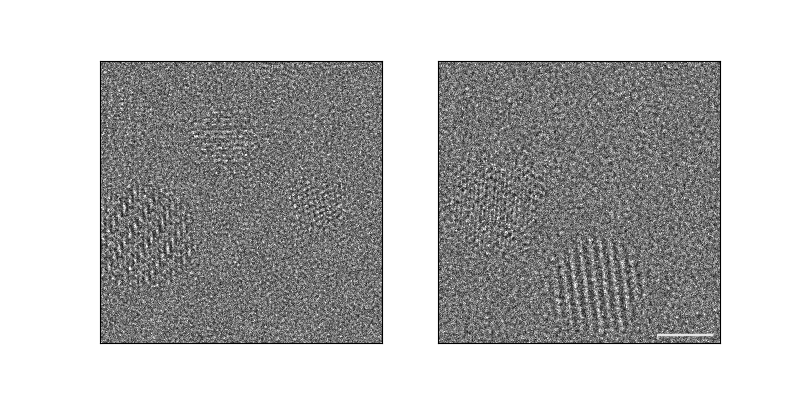

In [11]:
# | label: app:example_image_widget

idx_a_slider = IntSlider(
    value=1,
    min=0,
    max=15,
    step=1,
    description='Image #:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

idx_b_slider = IntSlider(
    value=2,
    min=0,
    max=15,
    step=1,
    description='Image #:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

dataset_select =  Select(
        options=["Defocus", "Noise", "Structure"],
        value="Defocus",
        rows=3,
        # description="Dataset",
        disabled=False,
        description_width='initial'
)


style = {'description_width': 'initial'}
defocus_a_slider = IntSlider(
    value=10,
    min=-25,
    max=25,
    step=5,
    description='Defocus (nm):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    # description_width='200px'
    style=style,
)

defocus_b_slider = IntSlider(
    value=20,
    min=-25,
    max=25,
    step=5,
    description='Defocus (nm):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)


structure_select_a =  Select(
        options=lattices,
        value=lattices[0],
        rows=3,
        description="Lattice",
        disabled=False,
        description_width='initial'
)

structure_select_b =  Select(
        options=lattices,
        value=lattices[0],
        rows=3,
        description="Lattice",
        disabled=False,
        description_width='initial'
)

size_select_a =  Select(
        options=['Large', 'Small'],
        value='Large',
        rows=3,
        description="Size",
        disabled=False,
        description_width='initial'
)

size_select_b =  Select(
        options=['Large', 'Small'],
        value='Large',
        rows=3,
        description="Size",
        disabled=False,
        description_width='initial'
)

dose_select_a =  Select(
        options=[30, 75, 150, 300, 600],
        value=300,
        rows=3,
        description="Dose",
        disabled=False,
        description_width='initial'
)

dose_select_b =  Select(
        options=[30, 75, 150, 300, 600],
        value=300,
        rows=3,
        description="Dose",
        disabled=False,
        description_width='initial'
)

toggle_mask_display = ToggleButton(
    value=False,
    description='Show segmentation',
    description_width='initial'
)

dataset_label =Label(
    'Dataset'
)

layout={"height": "200px"}

box_a = HBox([idx_a_slider, idx_b_slider],)
box_b = HBox([defocus_a_slider, defocus_b_slider],)
box_c = HBox([structure_select_a, structure_select_b],)
box_d = HBox([size_select_a, size_select_b],)
box_e = HBox([dose_select_a, dose_select_b],)

fbox_defocus = VBox([toggle_mask_display, box_a, box_b], layout=layout)
fbox_structures = VBox([toggle_mask_display, box_a, box_c, box_d], layout=layout)
fbox_noise = VBox([toggle_mask_display, box_a, box_e], layout=layout)
children = [
    fbox_defocus, fbox_structures, fbox_noise
]


tabs = Tab()
tabs.children = children
tabs.titles = ('Defocus', 'Structures', 'Noise')
display(tabs)

# select_box = VBox([dataset_label, dataset_select, toggle_mask_display], 
#                   layout={"align_items": "center",})

# full_box = HBox([
#     VBox([box_a, box_b, box_c, box_d, box_e]),
#     select_box
# ])


# display(full_box)
fig = plt.figure(figsize=(8, 4))

gs  = fig.add_gridspec(1,2)

ax_left = fig.add_subplot(gs[0])
ax_right = fig.add_subplot(gs[1])

ax_left.matshow(np.eye(128))
ax_right.matshow(np.eye(128))

def update_plot(*args):
    img_a_idx = idx_a_slider.value
    img_b_idx = idx_b_slider.value
    active_dataset = tabs.selected_index
    display_mask = toggle_mask_display.value

    match active_dataset:
        case 0 | "Defocus":
            defocus_a_slider.disabled = False
            defocus_b_slider.disabled = False
            structure_select_a.disabled = True
            structure_select_b.disabled = True
            size_select_a.disabled = True
            size_select_b.disabled = True
            dose_select_a.disabled = True
            dose_select_b.disabled = True

            defocus_a = defocus_a_slider.value
            defocus_b = defocus_b_slider.value

            group_a = f'defocus_{int(10*defocus_a)}'
            group_b = f'defocus_{int(10*defocus_b)}'

            active_df = defocus_df
            vmin = 0
            vmax = 35
        case 1 | "Structure":
            defocus_a_slider.disabled = True
            defocus_b_slider.disabled = True
            structure_select_a.disabled = False
            structure_select_b.disabled = False
            size_select_a.disabled = False
            size_select_b.disabled = False
            dose_select_a.disabled = True
            dose_select_b.disabled = True

            structure_a = structure_select_a.value
            structure_b = structure_select_b.value
            size_a = size_select_a.value
            size_b = size_select_b.value

            group_a = f'{structure_a}_{size_a.lower()}'
            group_b = f'{structure_b}_{size_b.lower()}'

            active_df = structure_df
            vmin = -4
            vmax = 4
        case 2 | 'Noise':
            defocus_a_slider.disabled = True
            defocus_b_slider.disabled = True
            structure_select_a.disabled = True
            structure_select_b.disabled = True
            size_select_a.disabled = True
            size_select_b.disabled = True
            dose_select_a.disabled = False
            dose_select_b.disabled = False

            dose_a = dose_select_a.value
            dose_b = dose_select_b.value

            group_a = f'dose_{dose_a}'
            group_b = f'dose_{dose_b}'


            active_df = noise_df
            vmin = -4
            vmax = 4

    

    query_a = f'group == "{group_a}" and idx == {img_a_idx}'
    query_b = f'group == "{group_b}" and idx == {img_b_idx}'
    img_a = load_data_from_df(active_df, query_a)
    img_b = load_data_from_df(active_df, query_b)

    ax_left.matshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
    ax_right.matshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)

    if display_mask:
        mask_a = load_mask_from_df(active_df, query_a)
        mask_b = load_mask_from_df(active_df, query_b)

        ax_left.imshow(mask_a, alpha=0.2, cmap='coolwarm_r', vmin=-1, vmax=1)
        ax_right.imshow(mask_b, alpha=0.2, cmap='coolwarm_r', vmin=-1, vmax=1)

    add_scalebar(ax_right)

    for ax in (ax_left, ax_right):
        ax.set_xticks([])
        ax.set_yticks([])



update_plot()
# plt.savefig('example_placeholder.png', dpi=300, bbox_inches='tight')
idx_a_slider.observe(update_plot, "value")
idx_b_slider.observe(update_plot, "value")

defocus_a_slider.observe(update_plot, "value")
defocus_b_slider.observe(update_plot, "value")

structure_select_a.observe(update_plot, "value")
structure_select_b.observe(update_plot, "value")

size_select_a.observe(update_plot, "value")
size_select_b.observe(update_plot, "value")

dose_select_a.observe(update_plot, "value")
dose_select_b.observe(update_plot, "value")

tabs.observe(update_plot, "selected_index")

toggle_mask_display.observe(update_plot, "value")
# plt.show()